<a href="https://colab.research.google.com/github/aline-fortaleza/Proj_estatistica/blob/main/Projeto_Estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Leitura de dados


In [ ]:
#importando as bibliotecas necessárias
import pandas as pd
import numpy as np
#visualização
import seaborn as sns
import matplotlib.pyplot as plt
#scikit learn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
#leitura do dataset
data_gym = pd.read_csv("/content/sample_data/gym.csv")
data_gym_1 = pd.read_csv("/content/sample_data/gym.csv") #esse data set vai ser utilizado para comparar os valores categorizados com o valor numérico original deles

In [ ]:
data_gym.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


#EDA


In [ ]:
#checar se tem algum valor faltando a qual precisa ser corrigido
data_gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


Todas as features apresentam 62184 valores não nulos, ou seja, não existem valores a serem preenchidos.

In [ ]:

data_gym.isnull().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

Escolhemos para análise as variáveis 'number_people', 'day_of_week', 'temperature', 'month' e 'hour'. Fizemos isso porque as outras variáveis, no fim, também são definidas por essas, já que quando 'day_of_week' assume os valores 5 e 6 o 'is_weekend' assume valor 1 e 'is_start_of_semester' e 'is_during_semester' também são definidos pelo mês vingente. Além disso, a relevância do 'is_holiday' é muito baixa devida a sua ocorrência ser muito baixa nos EUA (11 feriados por ano de 365 dias, aproximadamente 3% dos dias do ano).

In [ ]:
columns_kept = ['number_people', 'day_of_week', 'temperature', 'month','hour']
data_gym = data_gym[columns_kept]


In [ ]:
data_gym.describe()

,number_people,day_of_week,temperature,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,2.982504,58.557108,7.439824,12.236460
std,22.689026,1.996825,6.316396,3.445069,6.717631
min,0.000000,0.000000,38.140000,1.000000,0.000000
25%,9.000000,1.000000,55.000000,5.000000,7.000000
50%,28.000000,3.000000,58.340000,8.000000,12.000000
75%,43.000000,5.000000,62.280000,10.000000,18.000000
max,145.000000,6.000000,87.170000,12.000000,23.000000


#Categorização dos dados
Para simplificar a análise, decidimos dividir a variável number_people em 4 categorias:

Categoria 0: De 0 a 15

Categoria 1: De 16 a 30  

Categoria 2: De 31 a 45

Categoria 3: >= 45

In [ ]:
for i in range(62184):
    if data_gym.number_people[i]>=0 and data_gym.number_people[i]< 16:
           data_gym.number_people[i]=0
    elif data_gym.number_people[i]>=16 and data_gym.number_people[i]< 31:
           data_gym.number_people[i]=1
    elif data_gym.number_people[i]>=31 and data_gym.number_people[i]< 45:
           data_gym.number_people[i]=2
    elif data_gym.number_people[i] >= 45:
           data_gym.number_people[i]=3


<ipython-input-20-11498c07ed9a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gym.number_people[i]=3
<ipython-input-20-11498c07ed9a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gym.number_people[i]=2
<ipython-input-20-11498c07ed9a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gym.number_people[i]=1
<ipython-input-20-11498c07ed9a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

<Axes: xlabel='number_people', ylabel='count'>

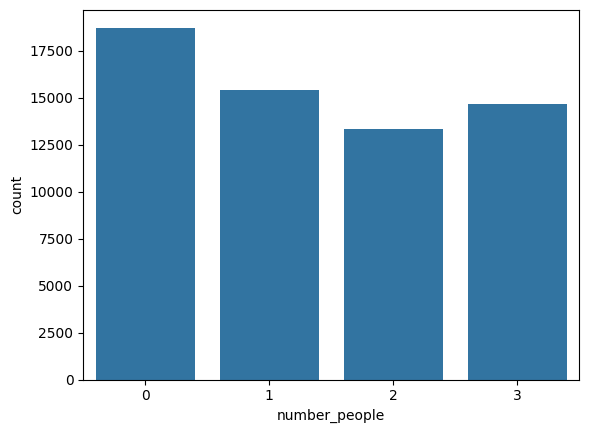

In [ ]:
#verificando se o dataset está balanceado
sns.countplot(x = data_gym["number_people"])

# Análise da categoria por Hora

In [ ]:
data_hour = data_gym.groupby('hour')
data_mean_hour = data_hour['number_people'].mean()
data_hour_1 = data_gym_1.groupby('hour')
data_mean_hour_1 = data_hour_1['number_people'].mean()

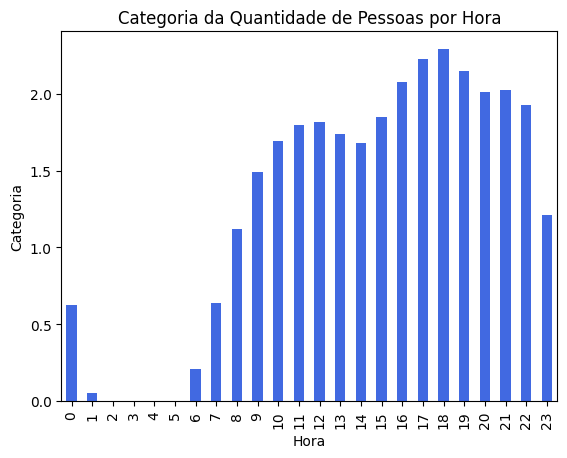

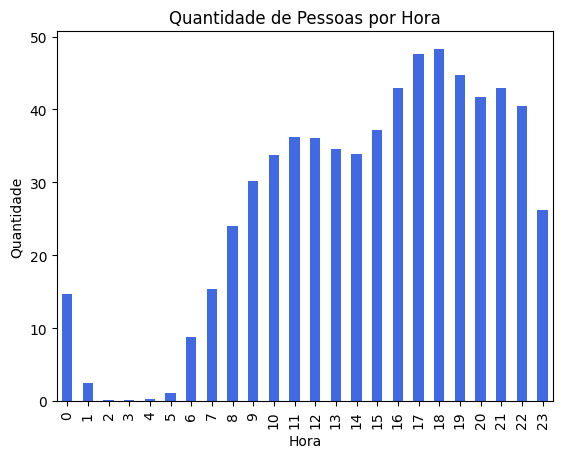

In [ ]:
data_mean_hour.plot(kind='bar', color='royalblue')
plt.title('Categoria da Quantidade de Pessoas por Hora')
plt.xlabel('Hora')
plt.ylabel('Categoria')
plt.show()
#mesmo gráfico só que com valores fora da categoria
data_mean_hour_1.plot(kind='bar', color='royalblue')
plt.title('Quantidade de Pessoas por Hora')
plt.xlabel('Hora')
plt.ylabel('Quantidade')
plt.show()

# Analise de media por mês

In [ ]:
x_month = data_gym.groupby(["month"])
y_count_per_month = data_gym.groupby(['month'])['number_people'].mean()
x_month_1 = data_gym_1.groupby(["month"])
y_count_per_month_1 = data_gym_1.groupby(['month'])['number_people'].mean()

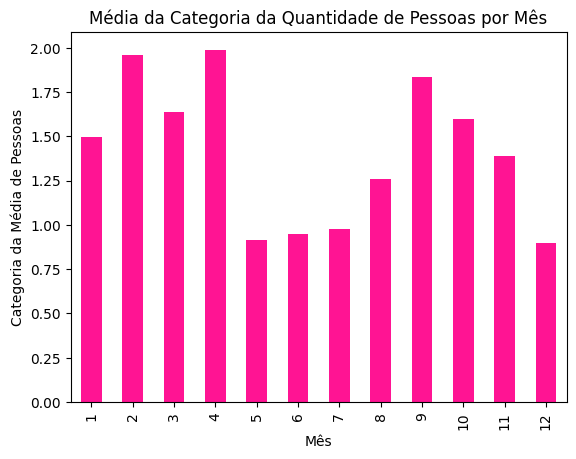

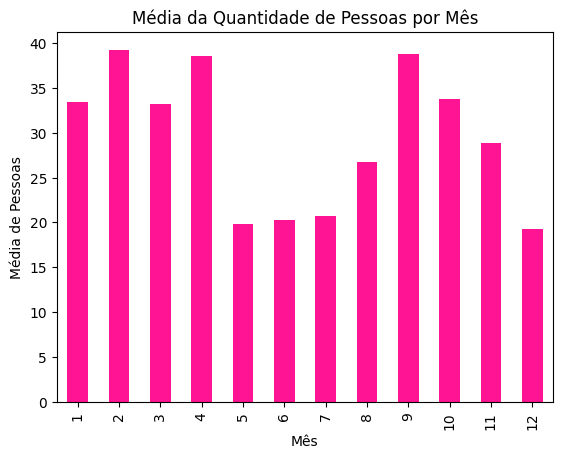

In [ ]:
y_count_per_month.plot(kind='bar', color='deeppink')
plt.title('Média da Categoria da Quantidade de Pessoas por Mês')
plt.xlabel('Mês')
plt.ylabel('Categoria da Média de Pessoas')
plt.show()
#Printando sem categoria para comparação
y_count_per_month_1.plot(kind='bar', color='deeppink')
plt.title('Média da Quantidade de Pessoas por Mês')
plt.xlabel('Mês')
plt.ylabel('Média de Pessoas')
plt.show()

# Agrupando temperaturas dos dados

In [ ]:
for i in range(62184):
    if data_gym.temperature[i]>=38 and data_gym.temperature[i]< 48:
           data_gym.temperature[i]= 0
           data_gym_1.temperature[i]= 0
    elif data_gym.temperature[i]>=48 and data_gym.temperature[i]< 58:
           data_gym.temperature[i]= 1
           data_gym_1.temperature[i]= 1
    elif data_gym.temperature[i]>=58 and data_gym.temperature[i]< 68:
           data_gym.temperature[i]= 2
           data_gym_1.temperature[i]= 2
    elif data_gym.temperature[i]>=68 and data_gym.temperature[i]< 78:
           data_gym.temperature[i]= 3
           data_gym_1.temperature[i]= 3
    elif data_gym.temperature[i]>=78 and data_gym.temperature[i]< 88:
           data_gym.temperature[i]= 4
           data_gym_1.temperature[i]= 4




<ipython-input-26-1d4cbb7ef2fd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gym_1.temperature[i]= 3
<ipython-input-26-1d4cbb7ef2fd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gym.temperature[i]= 3
<ipython-input-26-1d4cbb7ef2fd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gym.temperature[i]= 2
<ipython-input-26-1d4cbb7ef2fd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

# `Análise da média de pessoas por temperatura`

In [ ]:
x_month = data_gym.groupby(["temperature"])
y_count_per_temp = data_gym.groupby(['temperature'])['number_people'].mean()
x_month_1 = data_gym_1.groupby(["temperature"])
y_count_per_temp_1 = data_gym_1.groupby(['temperature'])['number_people'].mean()

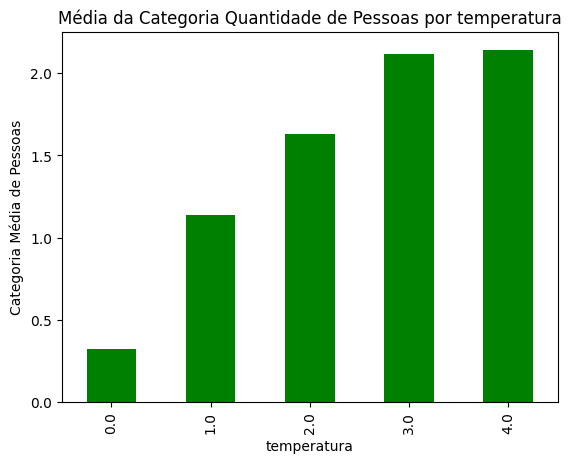

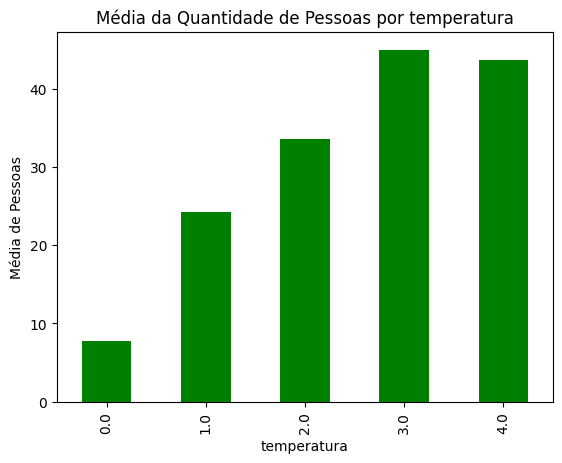

In [ ]:
y_count_per_temp.plot(kind='bar', color='green')
plt.title('Média da Categoria Quantidade de Pessoas por temperatura')
plt.xlabel('temperatura')
plt.ylabel('Categoria Média de Pessoas')
plt.show()
#Printando sem categoria para comparação
y_count_per_temp_1.plot(kind='bar', color='green')
plt.title('Média da Quantidade de Pessoas por temperatura')
plt.xlabel('temperatura')
plt.ylabel('Média de Pessoas')
plt.show()

#Análise da Média por Dia da Semana

In [ ]:
data_day_of_week = data_gym.groupby('day_of_week')
data_mean_day_of_week = data_day_of_week['number_people'].mean()
data_day_of_week_1 = data_gym_1.groupby('day_of_week')
data_mean_day_of_week_1 = data_day_of_week_1['number_people'].mean()

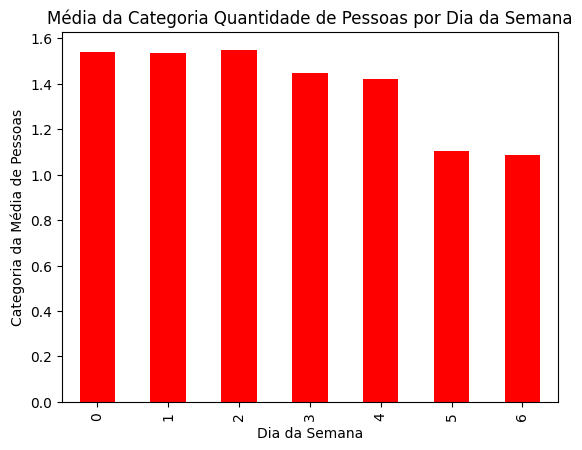

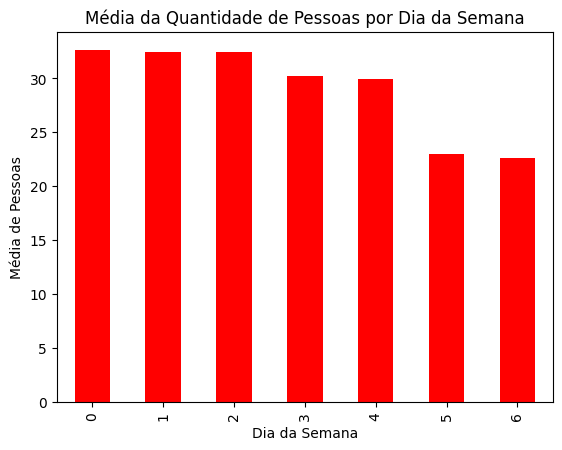

In [ ]:
data_mean_day_of_week.plot(kind='bar', color='red')
plt.title('Média da Categoria Quantidade de Pessoas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Categoria da Média de Pessoas')
plt.show()

data_mean_day_of_week_1.plot(kind='bar', color='red')
plt.title('Média da Quantidade de Pessoas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Média de Pessoas')
plt.show()

## NAIVE BAYES

In [ ]:
X_columns = ['day_of_week', 'temperature', 'month','hour']
X = data_gym[X_columns]
y = data_gym['number_people']
data_gym

,number_people,day_of_week,temperature,month,hour
0,2,4,3.0,8,17
1,3,4,3.0,8,17
2,2,4,3.0,8,17
3,2,4,3.0,8,17
4,3,4,3.0,8,17
...,...,...,...,...,...
62179,1,5,2.0,3,18
62180,1,5,2.0,3,18
62181,1,5,1.0,3,19
62182,1,5,1.0,3,19


In [ ]:
#Criando o conjunto de testes e de treino
X_train, X_test, y_train, y_teste = train_test_split(X, y, test_size = 0.3, random_state=0)

#Treinando o modelo
clf = GaussianNB()
clf.fit(X_train,y_train)

#Avaliando o modelo
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_teste, y_pred)
print(f"Accuracy: {accuracy}\n")
print(classification_report(y_teste, y_pred))

Accuracy: 0.5047169811320755

              precision    recall  f1-score   support

           0       0.66      0.83      0.74      5671
           1       0.40      0.31      0.35      4642
           2       0.35      0.03      0.06      3934
           3       0.42      0.72      0.53      4409

    accuracy                           0.50     18656
   macro avg       0.46      0.47      0.42     18656
weighted avg       0.47      0.50      0.45     18656



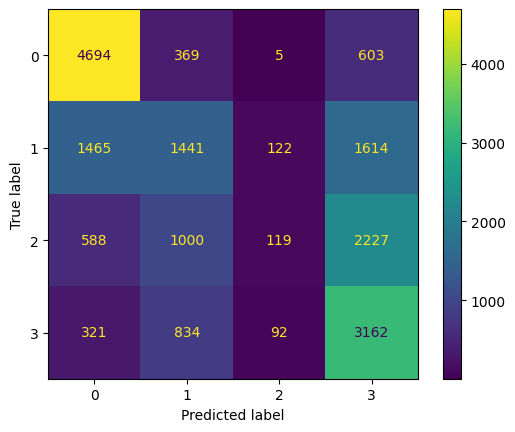

In [ ]:
labels = [0,1,2,3]
cm = confusion_matrix(y_teste, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();